# DeBERTa: Decoding-enhanced BERT with Disentangled Attention (2021)

출처: [https://arxiv.org/abs/2006.03654](https://arxiv.org/abs/2006.03654)

# ABSTRACT
pre-trained neural language model의 최근 발전으로 많은 natural language processing (NLP) task의 성능이 크게 향상되었습니다. 이 논문에서는 두 가지 새로운 기술을 사용하여 BERT 및 RoBERTa 모델을 개선하는 새로운 model architecture **DeBERTa** (**D**ecoding-enhanced **BERT** with disentangleed Attention)를 제안합니다. 첫 번째는 disentangled attention mechanism으로, 각 단어는 각각 내용과 위치를 encoding하는 두 개의 vector를 사용하여 표현되고 단어 간의 attention weight는 contents와 relative position에 대한 disentangled matrix를 사용하여 각각 계산됩니다. 둘째, enhanced mask decoder는 model pre-training에서 masked token을 예측하기 위해 decoding layer의 absolute position을 통합하는 데 사용됩니다. 또한, model의 일반화를 개선하기 위한 fine-tuning을 위해 새로운 virtual adversarial training 방법을 사용합니다. 우리는 이러한 기술이 model pre-training의 효율성과 natural language understanding (NLU) 및 natural language generation (NLG) downstream task의 성능을 크게 향상시킨다는 것을 보여줍니다. 

RoBERTa-Large와 비교하여 training data의 절반으로 학습된 DeBERTa 모델은 광범위한 NLP task에서 일관되게 더 나은 성능을 보여줍니다. 특히, 여기서는 15억 개의 parameter가 있는 48개의 Transform layer로 구성된 더 큰 version을 training하여 DeBERTa를 확장합니다. 성능이 크게 향상되어 single DeBERTa model은 macro-average score 측면에서 처음으로 SuperGLUE benchmark에서 사람의 성능을 능가했습니다.

# 1 INTRODUCTION
Transformer는 neural language modeling을 위한 가장 효과적인 neural network architecture가 되었습니다. text를 순서대로 처리하는 recurrent neural network (RNN)와 달리 transformer는 input text의 모든 단어를 parallel로 계산하기 위해 self attention을 적용하여 각 단어가 다른 단어에 미치는 영향을 측정하므로 대규모 model training에 RNN보다 더 많은 parallelization이 가능합니다. 2018년부터 GPT, BERT, RoBERTa, XLNet, UniLM, ELECTRA, T5, ALUM, StructBERT 그리고 ERINE과 같은 대규모 Transformer-based PLM(Pre-trained Language Models) 모델이 등장했습니다. 이러한 PLM은 task-specific label을 사용하여 fine-tuning되었으며 많은 downstream NLP(natual language processing) task에서 SOTA를 달성했습니다.

이 논문에서는 두 가지 새로운 기술인 disentangled attention mechanism과 enhanced mask decoder를 사용하여 이전 SOTA PLM을 능가하는 새로운 Transformer-based neural language model **DeBERTa** (**D**ecoding enhanced **BERT** with disentangleed Attention)를 제안합니다.

**Disentangled attention**
- input layer의 각 단어가 단어(content) embedding과 위치 embedding의 합인 vector를 사용하여 표현되는 BERT와 달리 DeBERTa의 각 단어는 각각 content과 위치를 encoding하는 두 개의 vector를 사용하여 표현됩니다. 단어들 사이의 weight은 각각의 content와 relative 위치를 기반으로 하는 disentangled matrix을 사용하여 계산됩니다. 이것은 word pair의 attention weight이 content뿐만 아니라 relative 위치에 따라 달라진다는 관찰에 의한 것입니다. 예를 들어, "deep"와 "learning"이라는 단어 사이의 의존성은 다른 문장에서 나타날 때보다 나란히 나타날 때 훨씬 더 강합니다.

**Enhanced mask decoder**
- BERT와 마찬가지로 DeBERTa는 MLM(Masked Language Modeling)을 사용하여 pre-training됩니다. MLM은 빈칸 채우기 작업으로, mask token을 둘러싼 단어를 사용하여 masking된 단어가 무엇인지 예측하도록 모델을 학습합니다. DeBERTa는 MLM을 위한 context word의 content와 위치 정보를 사용합니다. disentangled attention mechanism은 이미 context word의 content와 relative 위치를 고려하고, 이러한 단어의 absolute 위치는 고려하지 않지만, absolute 위치는 많은 경우 예측에 결정적인 역할을 합니다. 예측을 위해 "store" 및 "mall"이 이탤릭체로 masking된 "“a new store opened beside the new mall"라는 문장을 생각해봅시다. 두 단어의 local context는 비슷하지만, 문장에서 다른 문법적 역할을 합니다. (여기서 문장의 주어는 예를 들어, “mall”이 아니라 “store”입니다). 이러한 구문적 뉘앙스는 상당 부분 문장에서 단어의 absolute 위치에 따라 달라지므로 language modeling process에서 단어의 absolute 위치를 설명하는 것이 중요합니다. DeBERTa는 모델이 단어 content 및 위치의 aggregated contextual embedding을 기반으로 masking된 단어를 decoding하는 softmax layer 바로 전에 absolute 단어 위치 embedding을 합칩니다.

또한, PLM을 downstream NLP task로 fine-tuning하기 위한 새로운 virtual adversarial training 방법을 제안합니다. 이 방법은 model의 일반화를 개선하는 데 효과적입니다.

# 2 BACKGROUND

## 2.1 TRANSFORMER

([Transformer 설명 대체](https://choisk7.github.io/dl/%ED%8A%B8%EB%9E%9C%EC%8A%A4%ED%8F%AC%EB%A8%B8(Transformer)/))

제안된 disentangled attention mechanism은 단어의 content과 위치를 각각 인코딩하는 두 개의 vector를 사용하여 각 input 단어를 표현하고, 단어 간의 attention weight은 content과 relative 위치에 대한 disentangled matrix을 사용하여 각각 계산된다는 점에서 기존의 접근 방식과 다릅니다.

## 2.2 MASKED LANGUAGE MODEL
Large-scale Transformer-based PLM은 일반적으로 MLM(Masked Language Model)으로 알려진 self-supervision objective를 사용하여 상황에 맞는 단어 표현을 학습하기 위해 대량의 text에 대해 pre-training됩니다. 특히, sequence $\boldsymbol{X}=\left\{x_{i}\right\}$ 가 주어지면 token의 15%를 무작위로 masking하여 $\tilde{X}$ 로 바꾼 다음, $\tilde{X}$를 조건으로 masked token $\tilde{x}$ 를 예측하여 $\boldsymbol{X}$ 를 재구성하기 위해 $θ$ 에 통해 parameterize된 language model을 training합니다.

$$\max _{\theta} \log p_{\theta}(\boldsymbol{X} \mid \tilde{\boldsymbol{X}})=\max _{\theta} \sum_{i=\mathcal{C}} \log p_{\theta}\left(\bar{x}_{i}=x_{i} \mid \tilde{\boldsymbol{X}}\right){\tag1}$$

여기서 $C$ 는 sequence에서 masked token의 index set입니다. BERT 저자는 masked token의 10%를 원상태로 유지하고, 다른 10%는 무작위로 선택된 token으로 바꾸며, 나머지는 $[MASK]$ token으로 바꿀 것을 제안합니다.

# 3 THE DEBERTA ARCHITECTURE

## 3.1 DISENTANGLED ATTENTION: A TWO-VECTOR APPROACH TO CONTENT AND POSITION EMBEDDING
sequence에서 위치 $i$ 에 있는 token의 경우, 두 vector $\left\{\boldsymbol{H}_{i}\right\}$ 와 $\left\{P_{i \mid j}\right\}$ 를 사용하여 token의 content와 위치 $j$ 에 있는 token과의 relative 위치를 각각 나타냅니다. token $i$ 와 $j$ 사이의 cross attention score 계산은 다음과 같이 네 가지 구성 요소로 분해될 수 있습니다:

$$\begin{aligned}
A_{i, j} &=\left\{H_{i}, P_{i \mid j}\right\} \times\left\{H_{j}, P_{j \mid i}\right\}^{\top} \\
&=H_{i} H_{j}^{\top}+H_{i} P_{j \mid i}^{\top}+P_{i \mid j} H_{j}^{\top}+P_{i \mid j} P_{j \mid i}^{\top}
\end{aligned}{\tag2}$$

즉, 단어 pair의 attention weight은 $content-to-content$ , $content-to-position$ , $position-to-content$, $position-to-position$ 4개의 disentangled matrix를 사용하여 attention score의 합을 계산할 수 있습니다.

relative position encoding에 대한 기존 접근 방식은 attention weight을 계산할 때, relative position bias을 계산하기 위해 별도의 embedding matrix를 사용합니다. 이것은 equation 2에서 content-to-content와 content-to-position만을 사용하여 attention weight을 계산하는 것과 같습니다. 여기서는 단어 pair의 attention weight이 content뿐만 아니라 relative position에 따라 달라지기 때문에 position-to-content 또한 중요하다고 주장하는데, 이는 content-to-position과 position-to-content를 모두 사용하여 완전히 모델링할 수 있습니다. 우리는 relative position embedding을 사용하기 때문에 position-to-position은 많은 추가 정보를 제공하지 않아 implementation의 equation 2에서 제거됩니다.

single-head attention을 예로 들면, standard self-attention operation은 다음과 같이 나타낼 수 있습니다:

$$\begin{array}{c}
Q=H W_{q}, K=H W_{k}, V=H W_{v}, A=\frac{Q K^{\top}}{\sqrt{d}} \\
H_{o}=\operatorname{softmax}(A) V
\end{array}$$

$\boldsymbol{H} \in R^{N \times d}$ 는 input hidden vector를 나타내고, $\boldsymbol{H}_{o} \in R^{N \times d}$ 는 self-attention의 output, $\boldsymbol{W}_{\boldsymbol{q}}, \boldsymbol{W}_{\boldsymbol{k}}, \boldsymbol{W}_{v} \in R^{d \times d}$는 projection matrix, $A \in R^{N \times N}$는 attention matrix, $N$ 은 input sequence의 길이, $d$는 hidden state의 차원입니다.

$k$ 는 maximum relative distance로, $\delta(i, j) \in[0,2 k)$ 는 token $i$ 에서 token $j$ 까지의 relative distance로 나타내고, 이는 다음과 같이 정의됩니다:

$$\delta(i, j)=\left\{\begin{array}{rcl}
0 & \text { for } & i-j \leqslant-k \\
2 k-1 & \text { for } & i-j \geqslant k \\
i-j+k & \text { others. } &
\end{array}\right.{\tag3}$$

equation 4와 같이 relative position bias로 disentangled self-attention을 나타낼 수 있습니다. 여기서 $Q_c$ ,$K_c$ 및 $V_c$ 는 각각 projection matrix $W_{q, c}, W_{k, c}, W_{v, c} \in R^{d \times c}$ 를 사용하여 생성된 projected content vector이고, $\boldsymbol{P} \in R^{2 k \times d}$ 는 모든 layer에서 공유되는 relative position embedding vector, $Q_r$과 $K_r$ 은 각각 projection matrix $W_{\boldsymbol{q}, \boldsymbol{r}}, \boldsymbol{W}_{k, r} \in R^{d \times d}$ 를 사용하여 생성된 projected relative position vector입니다.

$$\begin{aligned}
Q_{c}=H W_{q, c}, K_{c} &=H W_{k, c}, V_{c}=H W_{v, c}, Q_{r}=P W_{q, r}, K_{r}=P W_{k, r}\end{aligned}$$


$$\begin{aligned}
\tilde{A}_{i, j} &=\underbrace{Q_{i}^{c} K_{j}^{c \top}}_{\text {(a) content-to-content }}+\underbrace{Q_{i}^{c} K_{\delta(i, j)}^{r}}_{\text {(b) content-to-position }}+\underbrace{K_{j}^{c} Q_{\delta(j, i)}^{r}}_{\text {(c) position-to-content }}\end{aligned}{\tag4}$$


$$\begin{aligned}
H_{o}=\operatorname{softmax}\left(\frac{\tilde{A}}{\sqrt{3 d}}\right) V_{c}
\end{aligned}$$

- $\tilde{A}_{i, j}$ 는 attention matrix $\tilde{A}$ 의 token $i$ 에서 token $j$ 까지의 attention score

- $Q_{i}^{c}$ 는 $Q_c$ 의 i번째 행

- $K_{j}^{c}$ 는 $K_c$ 의 j번째 행

- $K_{\delta(i, j)}^{r}$ 는 relative distance $\delta(i, j)$ 에 관한 $K_r$의 $\delta(i, j)$ 번째 행

- $Q_{\delta(j, i)}^{r}$ 는 relative distance $\delta(j, i)$ 에 관한 $Q_r$ 의 $\delta(j, i)$ 번째 행

- scaling factor $\frac{1}{\sqrt{3 d}}$ 는 안정적인 모델 training에 중요한 요인입니다

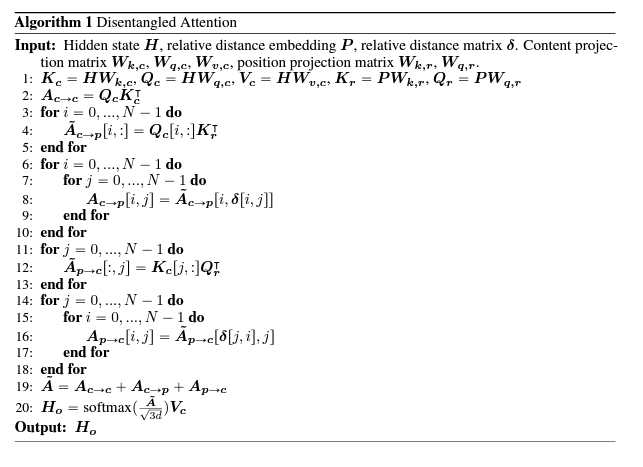

## 3.2 ENHANCED MASK DECODER ACCOUNTS FOR ABSOLUTE WORD POSITIONS
DeBERTa는 MLM을 사용하여 pre-training되며, 여기서 model은 mask toekn을 둘러싼 단어를 사용하여 masking된 단어가 무엇인지 예측하도록 training됩니다. DeBERTa는 MLM을 위한 context 단어의 content과 position 정보를 사용합니다. disentangled attention mechanism은 이미 context 단어의 content과 relative position을 고려하지만, 많은 경우 예측에 중요한 이러한 단어의 absolute position은 고려하지 않습니다.

예측을 위해 "store"와 "mall"이라는 단어가 masking된 "new **store** open an new **mall**"이라는 문장이 주어졌을 때, local context(예: relative position 및 주변 단어)만 사용하는 것은 모델이 이 문장에서 store와 mall을 구별하는 데 충분하지 않습니다. 둘 다 동일한 relative position인 new라는 단어를 따르기 때문입니다. 이 문제점을 해결하기 위해 model은 relative position에 대한 보완 정보로 absolute position을 고려해야 합니다. 예를 들어, 문장의 주어는 "mall"이 아니라 "store"입니다. 이러한 구문적 뉘앙스는 문장에서 단어의 absolute position에 크게 의존합니다.

absolute position을 합치는 방법에는 두 가지가 있습니다. BERT 모델은 input layer에 absolute position을 합칩니다. 하지만, DeBERTa에서는 masked Token 예측을 위한 softmax layer 전에 합칩니다. 이러한 방식으로 DeBERTa는 모든 Transformer layer에서 relative position을 담고, masking된 단어를 decoding할 때, absolute position만 보완 정보로 사용합니다. 따라서, DeBERTa의 decoding component를 EMD(Enhanced Mask Decoder)라고 합니다. empirical study에서는 absolute position를 합치는 이 두 가지 방법을 비교하고 EMD가 훨씬 더 잘 작동함을 관찰했습니다.

# 4 SCALE INVARIANT FINE-TUNING (SiFT)

virtual adversarial training은 모델의 일반화를 개선하기 위한 regularization 방법입니다. Miyato et al. (2018); Jiang et al. (2020)에 설명되어 있습니다.

# 5 EXPERIMENT

## 5.1 MAIN RESULTS ON NLU TASKS

### 5.1.1 PERFORMANCE ON LARGE MODELS

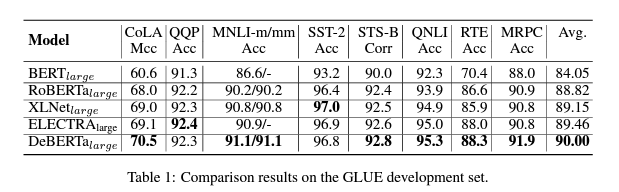

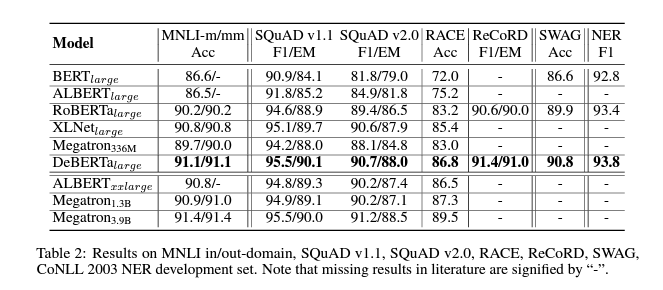

### 5.1.2 PERFORMANCE ON BASE MODELS

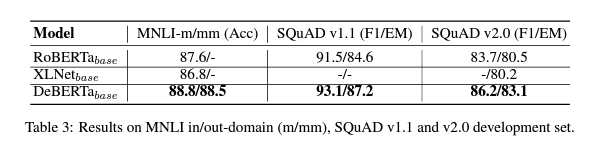

# 6 CONCLUSIONS
이 논문은 두 가지 새로운 기술을 사용하여 BERT 및 RoBERTa 모델을 개선하는 새로운 model architecture DeBERTa(Decoding-enhanced BERT with disentangleed Attention)를 나타냅니다. postion, 단어 간의 attention weight은 각각 content와 relative position에 대한 disentangled matrix을 사용하여 계산됩니다. 두 번째는 model pre-training에서 masked token을 예측하기 위해 decoding layer의 absolute position을 통합하는 enhanced mask decoder입니다. 또한, downstream task에 대한 model의 일반화를 개선하고, fine-tuning을 위해 새로운 virtual adversarial training 방법이 사용됩니다.

여기서는 포괄적인 실증 연구를 통해 이러한 기술이 model per-training의 효율성과 downstream task의 성능을 크게 향상시킨다는 것을 보여줍니다. 15억 개의 paramter가 있는 DeBERTa 모델은 macro-average score가 처음으로 SuperGLUE benchmark에서 사람의 성능을 능가합니다.

SuperGLUE에서 사람의 성과를 능가하는 DeBERTa는 general AI를 향한 중요한 이정표입니다. 하지만, SuperGLUE에서의 유망한 결과에도 불구하고, 이 모델은 NLU의 사람 수준의 지능에 도달하지 못합니다. 사람은 다양한 task에서 학습한 지식을 활용하여 새로운 task를 해결하는 데 매우 능숙합니다. 이를 compositional generalization, 친숙한 component(sub task 또는 기본적인 문제 해결 능력)의 새로운 composition(새로운 task)으로 일반화하는 능력이라고 합니다.

# A Appendix

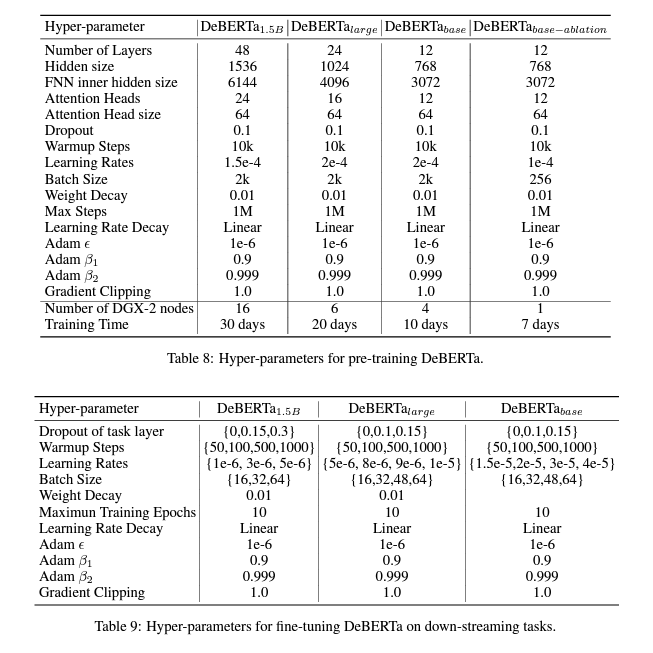

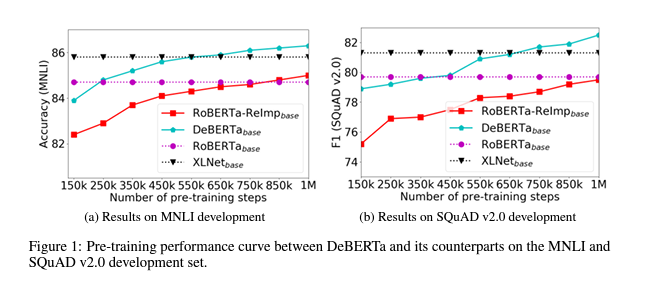